# Day 07: Laboratories

## Part 1

In [29]:
import copy

In [30]:
with open('input.txt', 'r') as f:
    data = [list(i) for i in f.read().split('\n')[:-1]]

In [31]:
carats = []
for r_index, row in enumerate(data):
    for c_index, col in enumerate(row):
        if(col == '^'):
            carats.append((r_index, c_index))

s_col = data[0].index('S')
valid = []
for carat in carats:
    if(carat == [2, s_col]):
        valid.append(carat)
        continue

    covered_dist = []
    within_range_dist = []
    for comp_carat in carats:
        if(comp_carat == carat):
            continue
        elif(comp_carat[0] >= carat[0]):
            continue
        elif(abs(comp_carat[1] - carat[1]) == 1):
            within_range_dist.append(carat[0]-comp_carat[0])
        elif(comp_carat[1] == carat[1]):
            covered_dist.append(carat[0]-comp_carat[0])
    
    if(within_range_dist == []):
        continue
    elif(covered_dist == []):
        valid.append(carat)
    elif(min(within_range_dist) < min(covered_dist)):
        valid.append(carat)


# print(len(list(set(valid))))

## Part 2

In [32]:
import timeit

In [33]:
start = timeit.default_timer()

splitters = {}
def path(data, row, col):
    if(row > len(data)-1):
        return 1
    elif(col > len(data[row])-1 or col < 0):
        return 0
    elif(data[row][col] in ('S', '.')):
        return path(data, row+1, col)
    elif(data[row][col] == '^'):
        if((row, col) in splitters.keys()):
            return splitters[(row, col)]
        splitters[(row, col)] = path(data, row, col-1) + path(data, row, col+1)
        return splitters[(row, col)]        

stop = timeit.default_timer()

# print(stop-start)
# print(path(data, 0, data[0].index('S')))

In [34]:
# plinko solution
start = timeit.default_timer()
matrix = [[int(n.replace('S', '1').replace('^', '-1').replace('.', '0')) for n in row] for row in data]

for row in range(len(matrix)):
    for col in range(len(matrix[row])):
        if(matrix[row][col] > 0):
            if(row+1 < len(matrix)):
                if(matrix[row+1][col] >= 0):
                    matrix[row+1][col] += matrix[row][col]
                elif(matrix[row+1][col] == -1):
                    if(col-1 >= 0):
                        matrix[row+1][col-1] += matrix[row][col]
                    if(col+1 <= len(matrix[row])):
                        matrix[row+1][col+1] += matrix[row][col]

stop = timeit.default_timer()

# print(stop-start)

# for row in matrix:
#     print('\t'.join([str(n) for n in row]))

# print(sum(matrix[-1]))

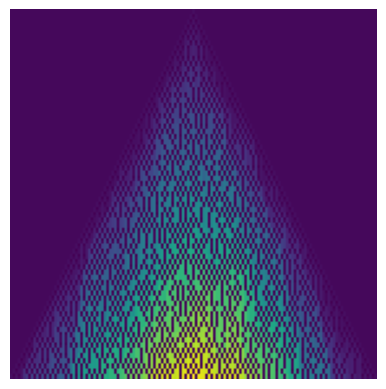

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.axis('off')
fig.set_frameon(0)
im = ax.imshow(np.log(np.array(matrix)+2))